<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.991 · Aprenentatge automàtic · PAC1</p>
<p style="margin: 0; text-align:right;">2023-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

**PAC 1: Preparació de dades**

Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades:

 <ol start="1">
  <li>Càrrega de conjunts de dades</li>
  <li>Anàlisis de les dades
  <br>2.1 Anàlisi estadístic bàsic 
  <br>2.2 Anàlisi exploratori de les dades
  <li>Preprocessament de les dades</li>
  <li>Reducció de la dimensionalitat</li>
  <li>Conjunts desbalancejats de dades</li>
</ol><br>

**Important:** Cada exercici pot suposar diversos minuts d'execució, per aquest motiu l'entrega ha de realitzar-se en format notebook i en format html, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a html des del menú File $\to$ Download as $\to$ HTML.

**Important:** Existeix un tipus de cel·la especial per comentaris de text. Aquest tipus de cel·la us serà molt útil per respondre preguntes teòriques. Per canviar el tipus de cel·la a aquest tipus, al menú: Cell $\to$ Cell Type $\to$ Markdown.

**Important:** La solució plantejada no ha d'utilitzar mètodes, funcions o paràmetres declarats “deprecated” en futures versions.
   
Per realitzar aquesta PAC necessitarem les següents llibreries:

<div class="alert alert-block alert-info">
<strong>Nom i cognoms:</strong> Ulises Rey
</div>

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Càrrega del conjunt de dades (0.5 punts)

En primer lloc, heu de carregar el conjunt de dades Wine recognition (més informació a l'enllaç [https://archive.ics.uci.edu/ml/datasets/Wine](https://archive.ics.uci.edu/ml/datasets/Wine)). Es pot descarregar d'internet o es pot carregar directament des de la llibreria scikit-learn, que incorpora un conjunt de datasets molt coneguts i usats per a la mineria de dades i machine learning: [http://scikit-learn.org/stable /datasets/index.html](http://scikit-learn.org/stable/datasets/index.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Carregueu el conjunt de dades "Wine Recognition" i mostreu:

<ul>
   <li>El nombre i nom dels atributs descriptius (variables que podrien ser usades per predir la variable objectiu "wine_class").</li>
   <li>El nombre de files (mostres) del conjunt de dades.</li>
   <li>Verifiqueu si hi ha o no "missing values" i en quines columnes.</li>
</ul>

Suggeriment: Si feu servir sklearn (sklearn.datasets.load_wine), exploreu les diferents 'keys' de l'objecte obtingut.
    
Suggeriment: separeu el conjunt de dades original en les variables "X" (atributs descriptius) i "y" (variable objectiu).
</div>

In [2]:
# Load the wine dataset
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

El nombre d'atributs es:

In [5]:
len(wine.feature_names)

13

Els atributs son:

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

El nombre de mostres es:

In [7]:
len(wine.data)

178

No hi ha cap columna que tingui valors Nan, tampoc en els targets (valors a predir)

In [8]:
wine_df=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
(wine_df.isnull() | wine_df.empty | wine_df.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=seed)

# 2. Anàlisis de les dades (2 punts)

## 2.1 Anàlisi estadístic bàsic

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Elaboreu una anàlisi estadístic bàsic:
<ul>
   <li>Variables categòriques:</li>
      <ul>
       <li>Calculeu la freqüència.</li>
       <li>Feu un gràfic de barres.</li>
     </ul>
   <li>Variables numèriques:</li>
     <ul>
       <li>Calculeu estadístics descriptius bàsics: mitjana, mediana, desviació estàndard, ...</li>
       <li>Feu un histograma de les variables: alcohol, magnesium i color_intensity.</li>
     </ul>
</ul>
Suggeriment: podeu fer servir la llibreria "pandes" i les seves funcions "descriu" i "value_counts", així com les funcions "bar", "hist" i "hist2d" de matplotlib.
</div>

Les uniques variables categoriques son els target a predir:

In [10]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [11]:
target_frequencies = (wine_df['target'].value_counts()/len(wine_df)).sort_index()
target_frequencies

0.0    0.331461
1.0    0.398876
2.0    0.269663
Name: target, dtype: float64

Text(0, 0.5, 'Frequency')

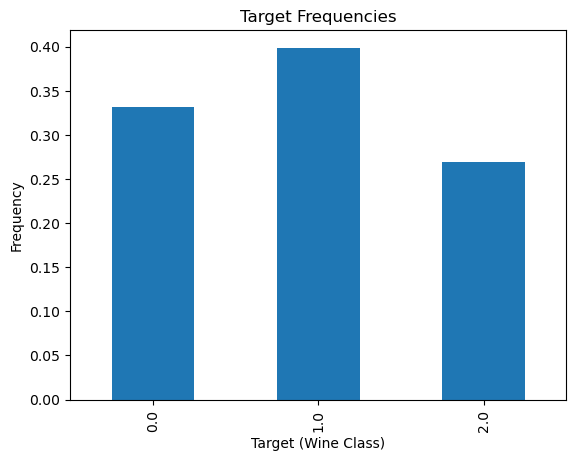

In [13]:
# Bar plot of categorical features
fig, ax = plt.subplots()
target_frequencies.plot(kind='bar', title='Target Frequencies', ax=ax)
ax.set_xlabel("Target (Wine Class)")
ax.set_ylabel("Frequency")

Aqui podem veure els estadistics basics:

In [14]:
wine_df.drop(columns="target").describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [15]:
columns_to_plot = ["alcohol", "magnesium", "color_intensity"]

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'magnesium'}>],
       [<AxesSubplot:title={'center':'color_intensity'}>, <AxesSubplot:>]],
      dtype=object)

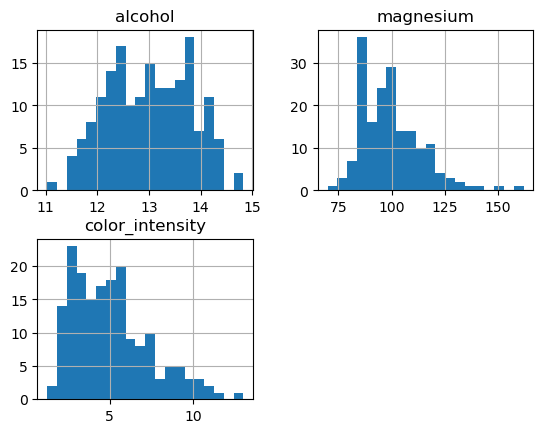

In [16]:
wine_df[columns_to_plot].hist(bins=20)

Tambe fem els plots de histogrames 2D per combinacions de les columnes:

In [17]:
import itertools

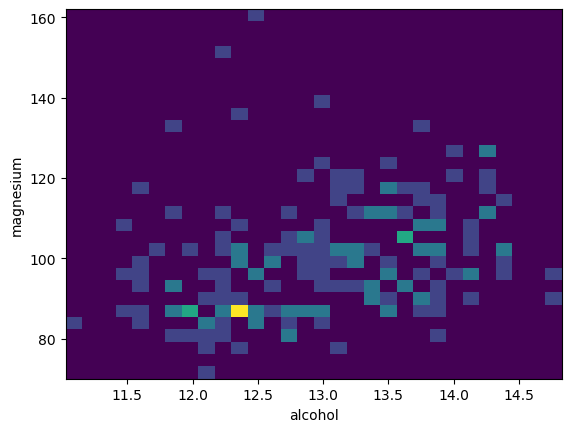

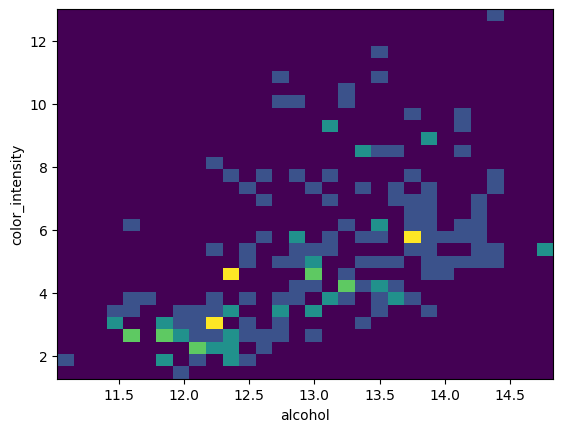

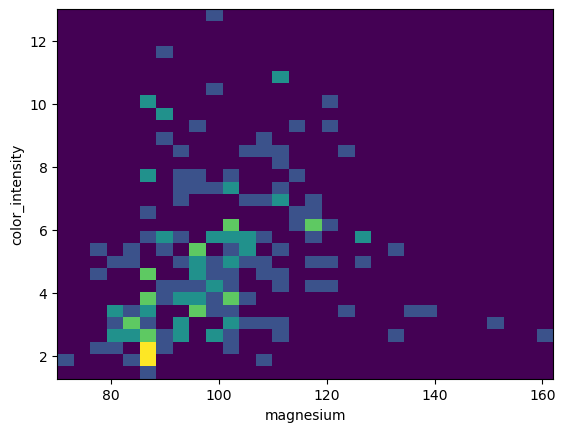

In [18]:
feature_pairs = itertools.combinations(columns_to_plot, 2)
for col1, col2 in feature_pairs:
    # print(col1, col2)
    plt.hist2d(wine_df[col1], wine_df[col2], bins=30)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Comenteu els resultats.
</div>

Per una banda hem vist que les tres catergories a predir tenen unes frequencies similars pero no identiques, sent la classe 1 la mes abundant.

Pel que fa als atributs ("features") veiem que tenen mitjanes i desviacions estandard molt diferents, i en particular pels atributs alcohol, magnesi i intensitat de color veiem que no segueixen una distribucio normal. Amb el hist2d veiem que hi ha certa correlacio, pero no molt alta entre els atributs (ho veure'm mes endavant en la notebook).

## 2.2 Anàlisi exploratori de les dades

En aquest exercici explorarem la relació d'alguns dels atributs numèrics amb la variable resposta ("wine_class"), tant gràficament com qualitativament, i analitzarem les diferents correlacions. Per començar, seleccionarem només 3 atributs per explorar: alcohol, magnesium i color_intensity.

In [19]:
feats_to_explore = ['alcohol', 'magnesium', 'color_intensity']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Usant una llibreria gràfica, com ara "matplotlib", feu un gràfic de l'histograma de valors per a cadascun dels atributs seleccionats, separats pels valors de la classe resposta. Els tres gràfics han d'estar sobreposats, és a dir, per exemple, a l'histograma de la feature "alcohol" hi ha d'haver en un sol gràfic tres histogrames, un per cada classe de vi. Afegiu una llegenda per saber a quina classe correspon cada histograma.
    
La finalitat és observar com es distribueix cadascun dels atributs en funció de la classe que tinguin, per poder identificar de manera visual i ràpida si alguns atributs permeten diferenciar de manera clara les diferents classes de vins.
    
<hr>
Suggeriment: podeu fer servir el paràmetre "alpha" als gràfics perquè s'apreciïn els tres histogrames.
</div>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


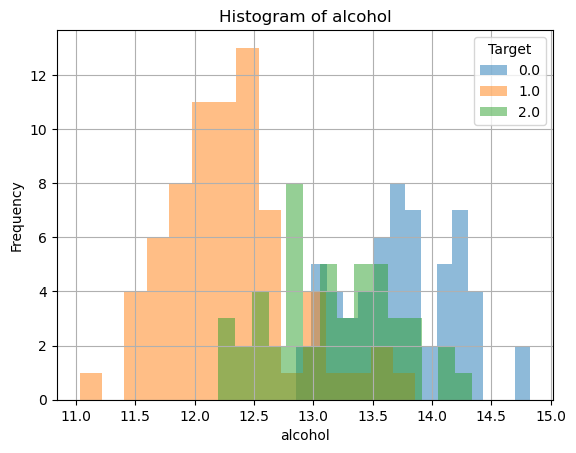

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


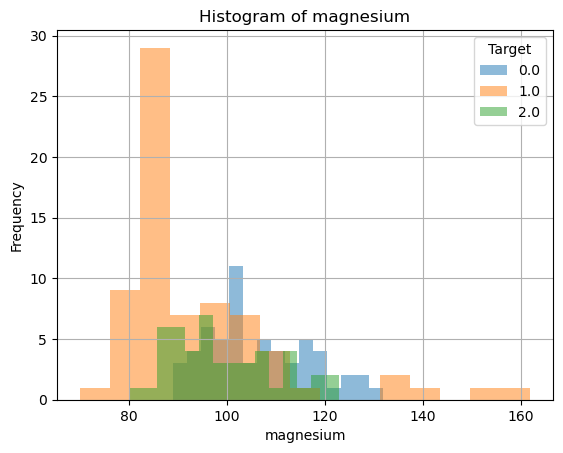

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


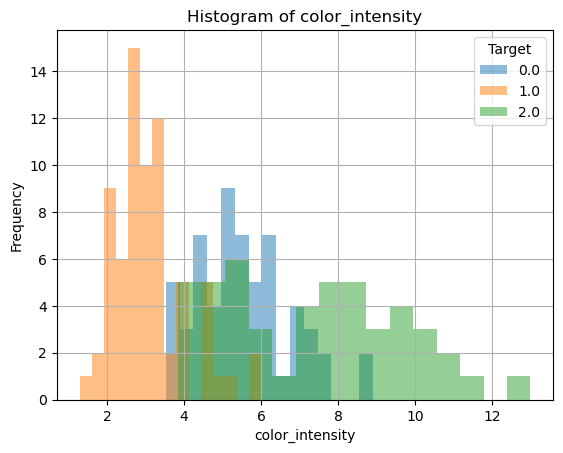

In [20]:
for feature in feats_to_explore:
    wine_df.groupby('target')[feature].hist(alpha=0.5, bins=15)#, label=wine_df["target"].unique())
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Target')
    plt.legend(wine_df["target"].unique(), title='Target')
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong>
<br> Mirant els histogrames, quin atribut sembla tenir més pes a l'hora de classificar un vi? Quin sembla tenir menys pes?
</div>

A primera vista sembla que la quantitat d'alcohol seria la millor d'aquestres tres variables per poder separar els vins per classe. La pitjor sembla ser la quantitat de magnesi, ja que els valors tenen molt overlap.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Usant els histogrames anteriors, afegiu una línia vertical indicant la mitjana de cadascun dels histogrames (tres per gràfic). Pinteu les línies del mateix color que l'histograma perquè quedi clar a quina fan referència.
    
Afegiu a la llegenda la classe de vi i la desviació estàndard en qüestió.

La finalitat és verificar numèricament les diferències identificades anteriorment de manera visual.
    
<hr>
Suggeriment: podeu fer servir "axvline", de matplotlib axis, per a les línies verticals.
</div>

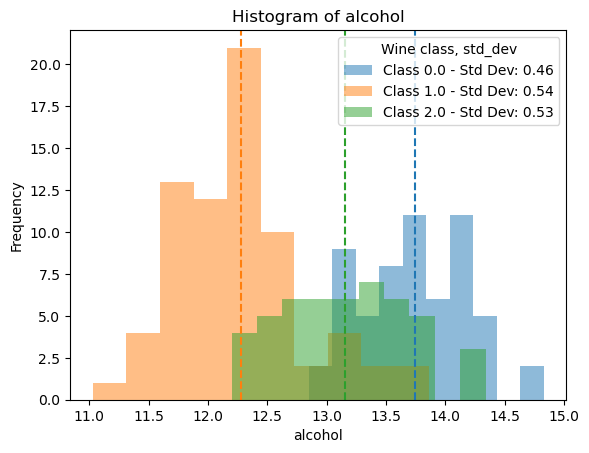

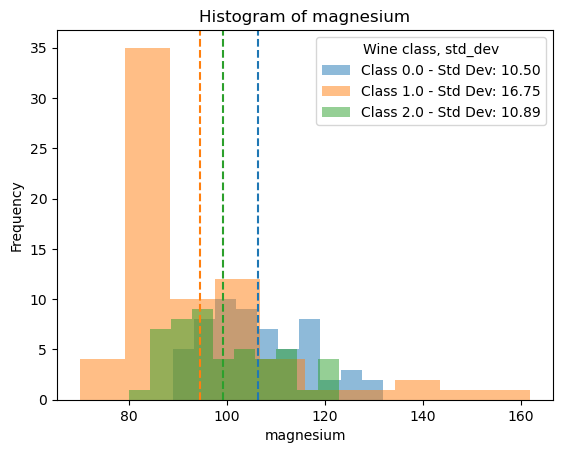

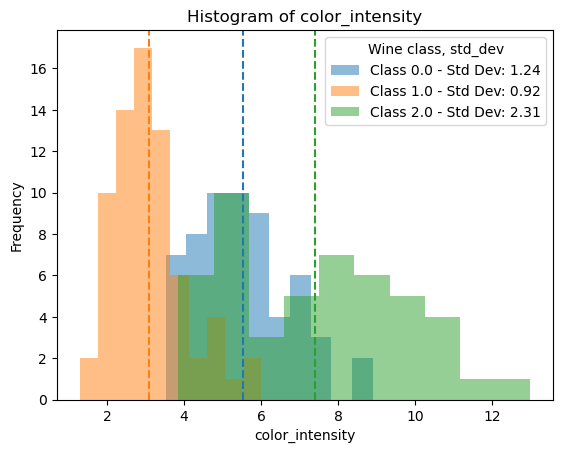

In [25]:
palette = sns.color_palette("tab10")

target_groups = wine_df['target'].unique()
color_dict = {target: color for target, color in zip(sorted(target_groups), palette)}


for feature in feats_to_explore:
    for target_group, group_data in wine_df.groupby('target'):
        color = color_dict[target_group]
        mean = group_data[feature].mean()
        std_dev = group_data[feature].std()
        label = f'Class {target_group} - Std Dev: {std_dev:.2f}'
        plt.hist(group_data[feature], color=color, label=label, alpha=.5)
        plt.axvline(mean, color=color, linestyle="--")
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Wine class, std_dev')
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Calculeu i mostreu la correlació entre les tres variables que estem analitzant.
</div>

In [26]:
wine_df[feats_to_explore].corr()

alcohol  magnesium  color_intensity
alcohol          1.000000   0.270798         0.546364
magnesium        0.270798   1.000000         0.199950
color_intensity  0.546364   0.199950         1.000000

Per si per "mostreu" es refereix a mostrar els grafics de disperssio:

array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='magnesium', ylabel='alcohol'>,
        <AxesSubplot:xlabel='color_intensity', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='magnesium'>,
        <AxesSubplot:xlabel='magnesium', ylabel='magnesium'>,
        <AxesSubplot:xlabel='color_intensity', ylabel='magnesium'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='color_intensity'>,
        <AxesSubplot:xlabel='magnesium', ylabel='color_intensity'>,
        <AxesSubplot:xlabel='color_intensity', ylabel='color_intensity'>]],
      dtype=object)

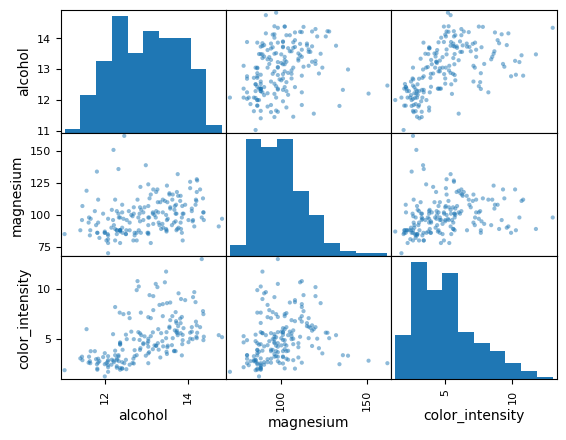

In [27]:
pd.plotting.scatter_matrix(wine_df[feats_to_explore], alpha=0.5)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Representeu gràficament les relacions entre aquestes variables (scatterplots). Diferenciau amb colors diferents les diferents classes.
    
La finalitat és observar i analitzar les correlacions de manera gràfica entre algunes de les variables.
    
<hr>Suggeriment: podeu fer servir la funció "pairplot" de la llibreria 'seaborn' amb el paràmetre "hue".
</div>

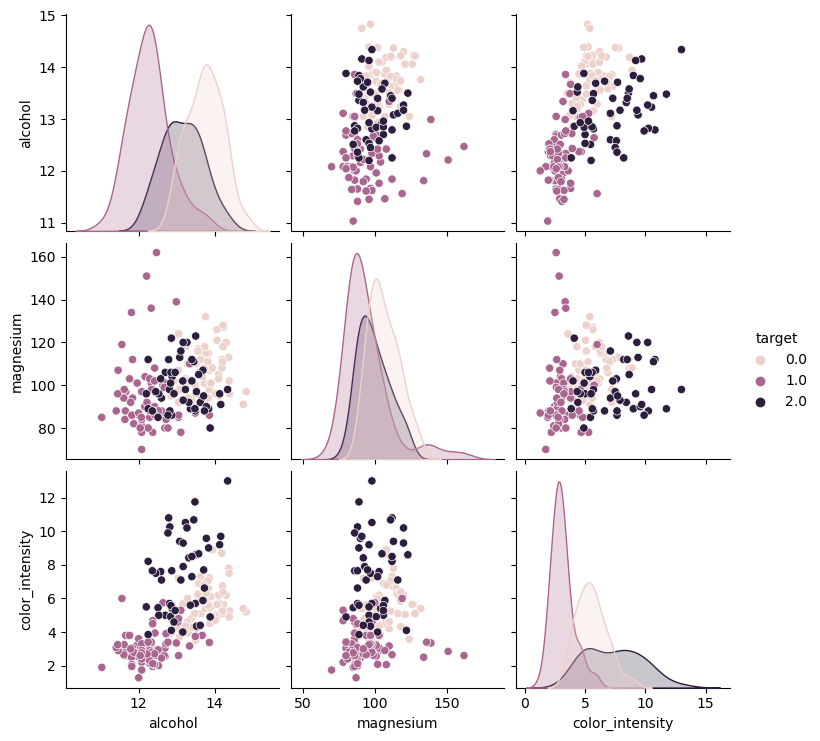

In [23]:
sns.pairplot(wine_df[feats_to_explore + ["target"]], hue="target")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Representeu en 3D les tres variables. Poseu noms als eixos i diferencieu amb colors diferents les diferents classes de vi.
    
La finalitat és complementar els gràfics anteriors i poder observar quines variables discriminen millor entre les tres classes de vi.
</div>

In [37]:
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

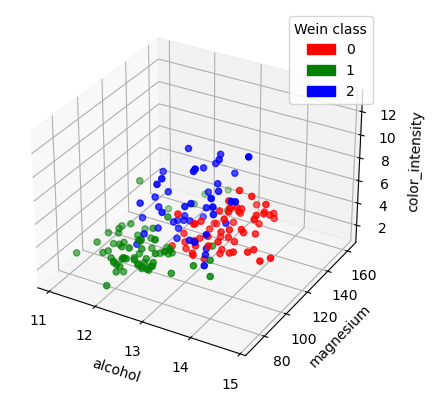

In [40]:
col=wine_df['target'].map({0:'r',1:'g',2:'b'})
                           
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
x, y, z = wine_df[feats_to_explore[0]], wine_df[feats_to_explore[1]], wine_df[feats_to_explore[2]]
ax.scatter(x,y,z, color=col, label=target_groups)
ax.set_xlabel(feats_to_explore[0])
ax.set_ylabel(feats_to_explore[1])
ax.set_zlabel(feats_to_explore[2])

# legend
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in [('0', 'r'), ('1', 'g'), ('2', 'b')]]
ax.legend(handles=legend_handles, title="Wein class")
plt.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong>
<br> Observant les correlacions, quines variables són les que tenen una correlació més forta? Quadra el resultat numèric amb els gràfics obtinguts?
</div>

El color i l'alcohol son les variables amb correlacio mes forta, i si que encaixa amb el resultat numeric.

# 3. Preprocessament de les dades (2.5 punts)

Un cop analitzats els atributs descriptius, és el moment de preparar-los perquè ens siguin útils de cara a predir valors. En aquest apartat:
<li>Estandarditzarem els valors dels atributs descriptius perquè les seves escales no siguin gaire diferents.</li>
<li>Separarem el conjunt de dades original en dos subconjunts: entrenament i test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> estandarditza tots els atributs descriptius.
<hr>
Suggeriment: utilitzeu "StandardScaler" de "preprocessing".
</div>

In [41]:
from sklearn.preprocessing import StandardScaler

In [44]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [45]:
my_scaler = StandardScaler()
standarized_features = my_scaler.fit_transform(wine_df[wine_df.drop(columns="target").columns])

In [46]:
wine_df_stdized = pd.DataFrame(standarized_features, columns=wine_df.drop(columns="target").columns)
wine_df_stdized

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
0           0.251717  0.362177                      1.847920  1.013009  
1          -0.293321  0.406051                      1.113449  0.965242  
2           0.269020  0.318304                      0.788587  1.395148  
3           1.186068 -0.427544                      1.184071  2.334574  
4          -0.319276  0.362177                      0.449601 -0.037874  
..               ...       ...                           ...       ...  
173         1.142811 -1.392758                     -1.231206 -0.021952  
174         0.969783 -1.129518                     -1.485445  0.009893  
175         2.224236 -1.612125                     -1.485445  0.280575  
176         1.834923 -1.568252                     -1.400699  0.296498  
177         1.791666 -1.524378                     -1.428948 -0.595160  

[178 rows x 13 columns]

In [47]:
wine_df_stdized.describe()

alcohol    malic_acid           ash  alcalinity_of_ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean   7.943708e-15  3.592632e-16 -4.066660e-15      -7.983626e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03   
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00   

          magnesium  total_phenols    flavanoids  nonflavanoid_phenols  \
count  1.780000e+02   1.780000e+02  1.780000e+02          1.780000e+02   
mean  -7.983626e-17  -3.991813e-17  9.979533e-16         -5.588538e-16   
std    1.002821e+00   1.002821e+00  1.002821e+00          1.002821e+00   
min   -2.088255e+00  -2.107246e+00 -1.695971e+00         -1.868234e+00   
25%   -8.244151e-01  -8.854682e-01 -8.275393e-01         -7.401412e-01   
50%   -1.222817e-01   9.595986e-02  1.061497e-01         -1.760948e-01   
75%    5.096384e-01   8.089974e-01  8.490851e-01          6.095413e-01   
max    4.371372e+00   2.539515e+00  3.062832e+00          2.402403e+00   

       proanthocyanins  color_intensity           hue  \
count     1.780000e+02     1.780000e+02  1.780000e+02   
mean     -1.656602e-15    -3.442939e-16  1.636643e-15   
std       1.002821e+00     1.002821e+00  1.002821e+00   
min      -2.069034e+00    -1.634288e+00 -2.094732e+00   
25%      -5.972835e-01    -7.951025e-01 -7.675624e-01   
50%      -6.289785e-02    -1.592246e-01  3.312687e-02   
75%       6.291754e-01     4.939560e-01  7.131644e-01   
max       3.485073e+00     3.435432e+00  3.301694e+00   

       od280/od315_of_diluted_wines       proline  
count                  1.780000e+02  1.780000e+02  
mean                   2.235415e-15 -1.197544e-16  
std                    1.002821e+00  1.002821e+00  
min                   -1.895054e+00 -1.493188e+00  
25%                   -9.522483e-01 -7.846378e-01  
50%                    2.377348e-01 -2.337204e-01  
75%                    7.885875e-01  7.582494e-01  
max                    1.960915e+00  2.971473e+00

Com veiem, ara tots els atributs tenen la mateixa mitjana (0) i la mateixa desviacio estandard.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> separa els atributs descriptius i la variable objectiu als subconjunts d'entrenament i test.
<hr>
Suggeriment: per separar entre train i test podeu fer servir "train_test_split" de sklearn.<br>
</div>

In [69]:
# We had done this already, but we re-do it
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=seed)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> explica si la decisió de transformar el conjunt de dades (estandardització) abans de fer la separació del conjunt de dades als subconjunts d'entrenament i test és una bona idea.
</div>

No, no es una bona idea. Estandaritzar, normalitzar, i qualsevol processament forma part en certa manera de l'entrenament del nostre model. Les dades que formen part del test no s'han d'utilizar per l'entrenament.
La manera correcte de fer-ho es primer de tot dividir les notres dades entre train i test, i despres processar el train. Posteriorment aplicarem les mateixes transformacions a test.

En l'exemple d'aquest exercici no es tan evident potser, pero ens podem imaginar un cas on les notres dades tinguin missing values que volguem imputar per exemple amb la mitjana. En aquest cas sera molt important imputar amb la mitjana nomes del training set, ja que sino estem utilitzant dades del test pel training (data leakage).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> En aquest exercici hem estandarditzat els valors dels atributs descriptius perquè les seves escales no siguin gaire diferents. Què ens aporta estandarditzar els atributs descriptius? hi ha alguna situació o escenari en què sigui imprescindible?
</div>

Els atributs per la seva naturalesa poden tenir valors i magnituds diferents. Estandaritzar ens assegura que les dades que farem servir, no tenen a prioir una contribucio major en el nostre model. Per exemple si volem predir el preu d'una casa un atribut sera el nombre d'habitacions (entre 1 i 5 seran valors habituals) i una altra els metres quadrats, que seran de l'ordre de 60-200, una altra la distancia al centre de la ciutat, etc. Per evitar que la variable amb una magnitud mes gran no tingui major efecte en el nostre model, hem d'estandaritzar les dades. En tots els escenaris on no tinguem coneixement a priori que una variable hauria de tenir mes pes, s'ha de fer estandaritzacio. Es imprescindible en els models que assumeixen distribucio normales de les dades, xarxes neuronals, o en algoritmes on es calculin distancies com KNN, cosine similarity, o que facin servir regularitzacions (L1 o L2 per exemple).


# 4. Reducció de la dimensionalitat (2.5 punts)

Amb el propòsit de comprovar visualment la distribució de la variable objectiu tenint en compte tots els atributs descriptius alhora, reduirem la dimensionalitat del problema a només dos atributs que seran la projecció dels atributs descriptius originals.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
     <li>Apliqueu el mètode de reducció de la dimensionalitat Principal Component Analysis (PCA) per reduir a 2 dimensions el dataset sencer amb totes les features.</li>
     <li>Genereu un gràfic en 2D amb el resultat del PCA usant colors diferents per a cadascuna de les classes de la resposta (wine_class), amb l'objectiu de visualitzar si és possible separar eficientment les classes amb aquest mètode.</li>
</ul>
    
NOTA: Aneu amb compte, no inclogueu la variable objectiu en la reducció de dimensionalitat. Volem explicar la variable objectiu en funció de la resta de variables reduïdes a dues dimensions.

<hr>
Suggeriment: no cal que programeu l'algorisme de PCA, podeu fer servir la implementació disponible a la llibreria de "scikit-learn".<br>
</div>

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(wine_df_stdized)

Text(0.5, 0.98, 'PCA')

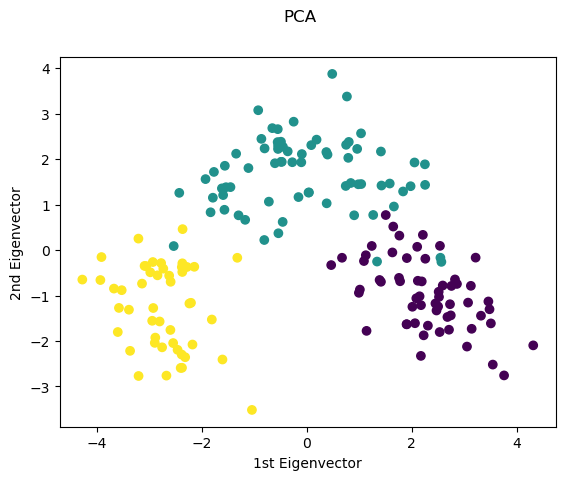

In [49]:
fig, ax = plt.subplots()
ax.scatter(principal_components[:, 0], principal_components[:, 1], c=wine.target)
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
fig.suptitle("PCA")

Per curiositat he volgut veure el resultat de PCA si no normalitazvem les dades. Es veu clarament que la separacio es pitjor:

Text(0.5, 0.98, 'PCA without estandarization')

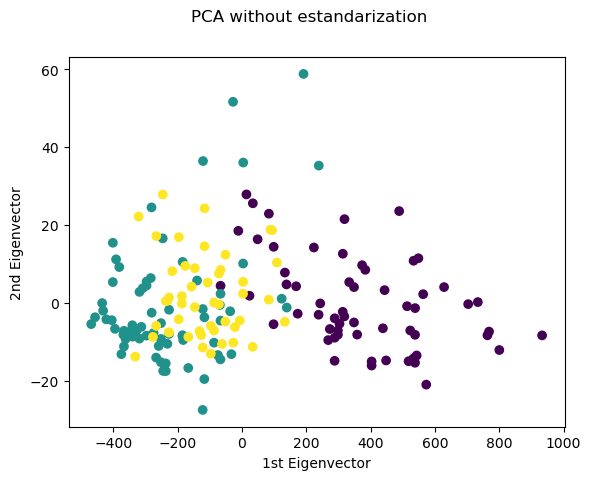

In [50]:
wine_df_no_target = wine_df[wine_df.drop(columns="target").columns]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(wine_df_no_target)
fig, ax = plt.subplots()
ax.scatter(principal_components[:, 0], principal_components[:, 1], c=wine.target)
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
fig.suptitle("PCA without estandarization")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
     <li>Repetiu la reducció de dimensionalitat, però en aquest cas usant TSNE. Podeu trobar més informació sobre aquest algorisme al link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a>< /li>
     <li>Com abans, genereu un gràfic en 2D amb el resultat del PCA usant colors diferents per a cadascuna de les classes de la resposta (wine_class), amb l'objectiu de visualitzar si és possible separar eficientment les classes amb aquest mètode. </li>
</ul>

<hr>
Suggeriment: no cal que programeu l'algorisme TSNE, podeu fer servir la implementació disponible a la llibreria de "scikit-learn".<br>
Suggeriment: a part d'especificar el nombre de components, proveu de fer servir els paràmetres "learning_rate" i "perplexity".<br>
</div>

In [162]:
len(wine_df_stdized)

178

In [66]:
from sklearn.manifold import TSNE
tsne_model_1 = TSNE(n_components=2, perplexity=3, random_state=seed)
wine_embedded_1 = tsne_model_1.fit_transform(wine_df_stdized)

tsne_model_2 = TSNE(n_components=2, perplexity=100, random_state=seed)
wine_embedded_2 = tsne_model_2.fit_transform(wine_df_stdized)



Text(0.5, 0.98, 'TSNE')

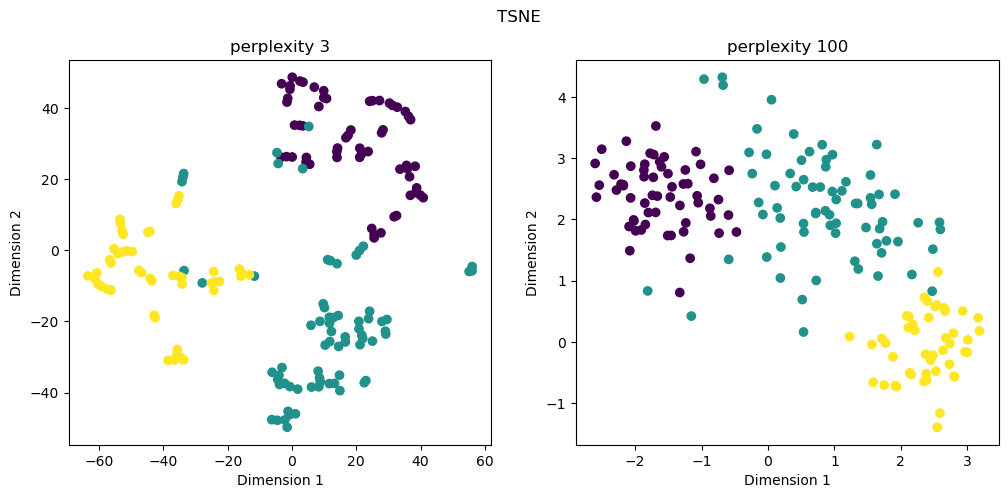

In [67]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
axes[0].scatter(wine_embedded_1[:, 0], wine_embedded_1[:, 1], c=wine.target)
axes[0].set_title("perplexity 3")
axes[1].scatter(wine_embedded_2[:, 0], wine_embedded_2[:, 1], c=wine.target)
axes[1].set_title("perplexity 100")


for ax in axes:
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
fig.suptitle("TSNE")

In [74]:
tsne_model_3 = TSNE(n_components=2, learning_rate=0.1, perplexity=3, random_state=seed)
wine_embedded_3 = tsne_model_3.fit_transform(wine_df_stdized)

tsne_model_4 = TSNE(n_components=2, learning_rate=0.001, perplexity=100, random_state=seed)
wine_embedded_4 = tsne_model_4.fit_transform(wine_df_stdized)

Text(0.5, 0.98, 'TSNE')

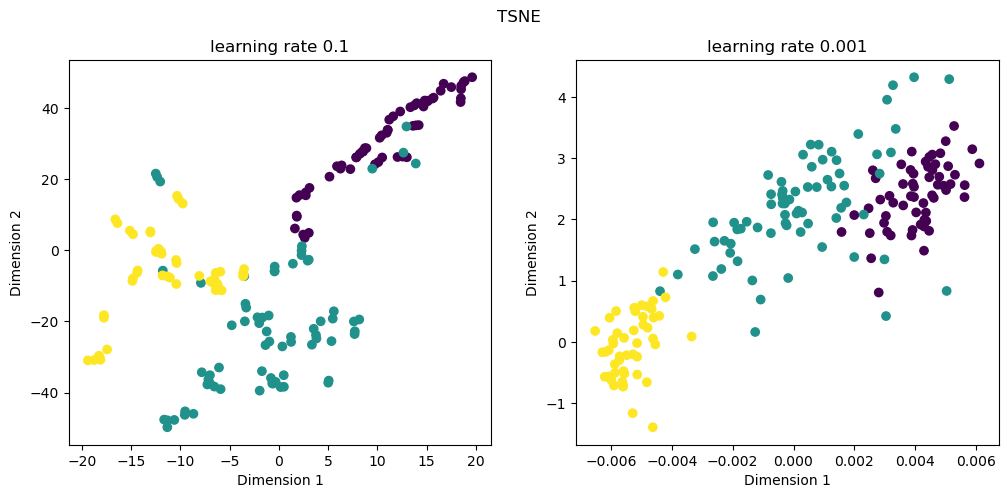

In [75]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
axes[0].scatter(wine_embedded_3[:, 0], wine_embedded_1[:, 1], c=wine.target)
axes[0].set_title("learning rate 0.1")
axes[1].scatter(wine_embedded_4[:, 0], wine_embedded_2[:, 1], c=wine.target)
axes[1].set_title("learning rate 0.001")


for ax in axes:
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
fig.suptitle("TSNE")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong>
<br> Observant els dos gràfics, creus que ha funcionat bé la reducció de dimensionalitat? Heu aconseguit separar les classes correctament? Quin dels dos mètodes ha funcionat millor?
    
Per què obtenim resultats tan diferents?
</div>

Si, la reduccio de dimensionalitat ha ajudat a poder seprar les classes de vins. Amb els parametres per defecte PCA ha funcionat millor. En PCA hema conseguit separar-les correctament i en el t-SNE tambe pero no tant. Amb els parametres per defecte PCA es millor. En el t-SNE he modificat alguns parametres per veure si conseguia separar millor i he vist que augmentat la perplexitat alta (te a veure amb els nearest neighbours que es fan servir per calcular distancies) la separacio millora. Tambe amb un learning rate mes petit, millora.

Els resultats de PCA i t-SNE son diferents perque son algoritmes diferents, de fet la S the t-SNE vol dir "stochastic" i t-SNE dona resultats diferents en cada execució (a no ser que es fixi el random_state). Els dos algoritmes en realitat son complementaris i moltes vegades es fa servir PCA primer per reduir la dimensionalitat i despres t-SNE (la funcio a scikit learn de fet permet passar init="pca" com a parametre.)

# 5. Conjunts desbalancejats de dades (2.5 punts)

En els problemes de classificació, és molt comú trobar conjunts de dades molt desbalancejats. A la indústria hi ha múltiples exemples, com la detecció de frau o la fuita de clients. Per aquest motiu, aquest exercici se centra en l‟anàlisi d‟aquest tipus de conjunts.

Utilitzarem un conjunt de dades simplificat del data set <strong>Turbo Engine</strong> del [NASA Prognostics Center of Excellence Data Set Repository](https://data.phmsociety.org/nasa/), el qual només estarà format per dues característiques explicatives, i la variable objectiu, per així poder analitzar visualment el problema de manera senzilla. En aquest data set tenim mesuraments dels sensors d'un motor cada cert temps, la variable objectiu és l'estat del motor, el qual indica si hi ha avaria o no en l'instant del mesurament.

Començarem carregant el conjunt de dades:

In [76]:
engine_df = pd.read_csv('Turbo_engine.csv', sep=';')
target_feat = 'y'
x1_feat = 'x_1'
x2_feat = 'x_2'

engine_df.head()

x_1    x_2  y
0    1  64182  0
1    2  64215  0
2    3  64235  0
3    4  64235  0
4    5  64237  0

A continuació, analitzarem la distribució del nostre conjunt de dades. Per fer-ho, utilitzarem la funció <strong>show_distribution</strong>:

In [77]:
def show_distribution(df):
    freq = df[target_feat].value_counts()
    plt.pie(freq, labels=('No engine failure ('+str(freq[0])+')', 'Engine failure ('+str(freq[1])+')'), autopct='%1.1f%%')
    plt.title("Engine failure distribution")

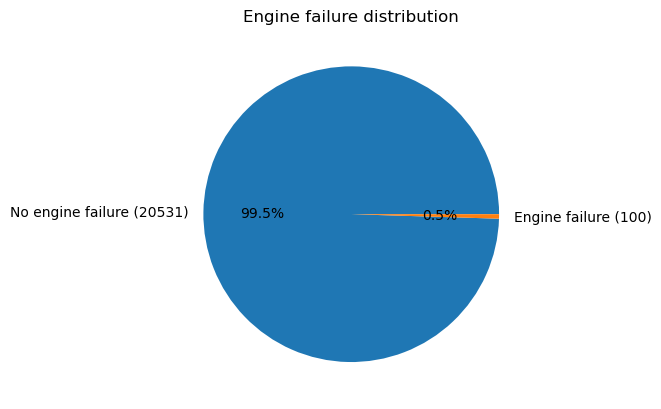

In [78]:
show_distribution(engine_df)

Com es pot observar, el conjunt està molt desbalancejat, ja que només 0.5% de les mostres es corresponen amb una situació d'avaria al motor.

Aprofitant que només tenim dues característiques descriptives, mostrarem mitjançant un scatter plot el nostre conjunt de dades. Per això utilitzarem la funció <strong>plot_data</strong>. Aquesta funció rep tres paràmetres:


<ul>
     <li>data_sets: Una llista de DataFrames a graficar. Cadascú ha de contenir les dues característiques descriptives, i la classe, ("i", engine failure).</li>
     <li>only_failures: Paràmetre booleà que indica si només volem veure les avaries del motor o per contra, tot el data set. En aquest darrer cas, a més, es mostrarà la frontera de decisió d'un classificador lineal base.</li>
     <li>cmap: Valor del paràmetre "cmap" per a l'scatter plot.</li>
</ul>

In [79]:
def plot_data(data_sets, only_failures=False, cmap='Paired'):

    if not isinstance(data_sets, list):
        data_sets = [data_sets]

    colors = np.array(["skyblue", "red"])
    fig, ax = plt.subplots(len(data_sets), 1, figsize=(12, 7 * len(data_sets)))

    for i, data in enumerate(data_sets):
        data = data if not only_failures \
            else data[data[target_feat] == 1]

        eff_ax = ax if len(data_sets) == 1 else ax[i]
        X = data[[x1_feat, x2_feat]].values
        y = data[target_feat].values

        if not only_failures:
            clf = LinearDiscriminantAnalysis()
            clf.fit(X, y)

            h = 2
            x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
            y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h

            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                                 np.arange(y_min, y_max, h))

            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            eff_ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
            eff_ax.contour(xx, yy, Z, colors='black', linewidths=0.7)

        eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')

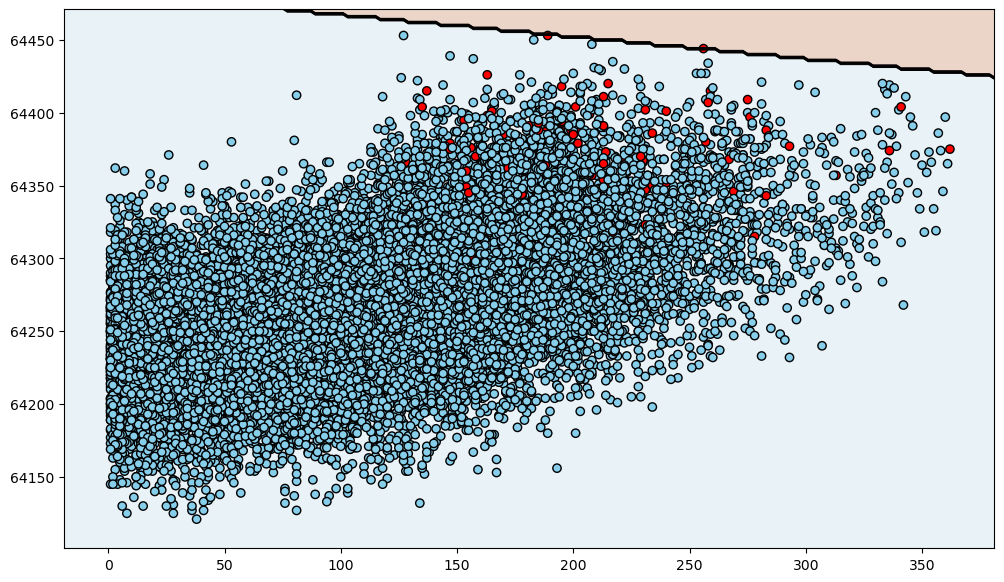

In [80]:
plot_data([engine_df], only_failures=False)

A la imatge anterior, es pot observar la distribució del nostre conjunt de dades. Com ja havíem analitzat, hi ha molt poques avaries de motor (punts vermells). A la imatge, a més, es pot veure la frontera de decisió del classificador base. Aquesta frontera permet veure les àrees que el model considera que són d'una classe i les que considera que són d'una altra. En posar a sobre els punts veiem si els classifica correctament a l'àrea que els correspon. En aquest cas, la frontera divideix el conjunt de dades en dues parts, tenint només dos punts en una (avaria de motor, part superior).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> per quin motiu el classificador podria estar fent aquesta divisió? aquesta separació és més o menys eficient que predir sempre la classe 0, és a dir, sense avaria de motor? quina mètrica caldria fer servir en aquest tipus de problemes? Justifiqueu totes les respostes.
</div>

El classificador LinearDiscriminantAnalysis() intenta separar els dos grups fent servir SVD per defecte. A priori el model no sap que les dades estan desbalancejades ni que per nosaltres es molt important detectar totes les avaries, per tant intenta fer la millor divisio sense tenir en compte aixo. Aquesta separacio es millor que predir sempre 0, perque almenys en aquest cas detectem 2 avaries. La pregunta "Que es mes eficient" depen de la què li estiguem demanant al nostre model. En aquest cas volem poder detectar totes les possibles avaries, no només dues, per aixo seria recomanable que la nostra pipeline una metrica per dades desbalancejades, com pere exemple Precision, Recall, F-1 Score o ROC-AUC. Per exemple Recall calcula els verdades positius (TP) entre els positius totals (TP+ Falsos negatius). El model actual tindria un Recall baix, el que ens indica que no es gaire bo.

Per abordar el problema de dades desbalancejades, analitzarem la tècnica de sobremostreig (oversampling) de la classe minoritària. A la literatura hi ha més tècniques per abordar aquest problema, com el submostreig (undersampling) de la classe majoritària, però en aquesta PAC ens centrarem només en aquesta tècnica.

## 5.1 Oversampling

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> incrementeu les mostres de la classe minoritària fins a assolir un nombre similar d'elements que la classe majoritària, aplicant les tècniques següents:
<ul>
     <li>Duplicació aleatòria (random over-sampling), fixant random_state=10.</li>
     <li>SMOTE (Synthetic Minority Over-sampling Technique), fixant random_state=10.</li>
     <li>ADASYN (Adaptive Synthetic Sampling), fixant random_state=10.</li>
</ul>
    
Finalment, comproveu el resultat d'aplicar cadascuna de les tècniques utilitzant la funció <strong>show_distribution</strong>.
<hr>
Suggeriment: per aplicar la duplicació aleatòria podeu fer servir "RandomOverSampler" d'imblearn.<br>
Suggeriment: per aplicar smote podeu fer servir "SMOTE" d'imblearn.<br>
Suggeriment: per aplicar cada un podeu fer servir "ADASYN" d'imblearn.<br>
</div>

In [81]:
engine_df

x_1    x_2  y
0        1  64182  0
1        2  64215  0
2        3  64235  0
3        4  64235  0
4        5  64237  0
...    ...    ... ..
20626  196  64349  0
20627  197  64354  0
20628  198  64342  0
20629  199  64323  0
20630  200  64385  1

[20631 rows x 3 columns]

In [84]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours

In [85]:
# Random Over Sampler
ros = RandomOverSampler(random_state=10)
X_res_ros, y_res_ros = ros.fit_resample(engine_df[["x_1", "x_2"]], engine_df["y"])
res_ros = X_res_ros
res_ros["y"] = y_res_ros
# Smote
smote = SMOTE(random_state=10)
X_res_smote, y_res_smote = smote.fit_resample(engine_df[["x_1", "x_2"]], engine_df["y"])
res_smote = X_res_smote
res_smote["y"] = y_res_smote
# Adasyn
adasyn = ADASYN(random_state=10)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(engine_df[["x_1", "x_2"]], engine_df["y"])
res_adasyn = X_res_adasyn
res_adasyn["y"] = y_res_adasyn

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> grafiqueu les avaries del conjunt de dades original i l'obtingut en aplicar Random Over Sampling, utilitzant la funció <strong>plot_data</strong> amb el paràmetre "only_failures" fixat a True.
</div>

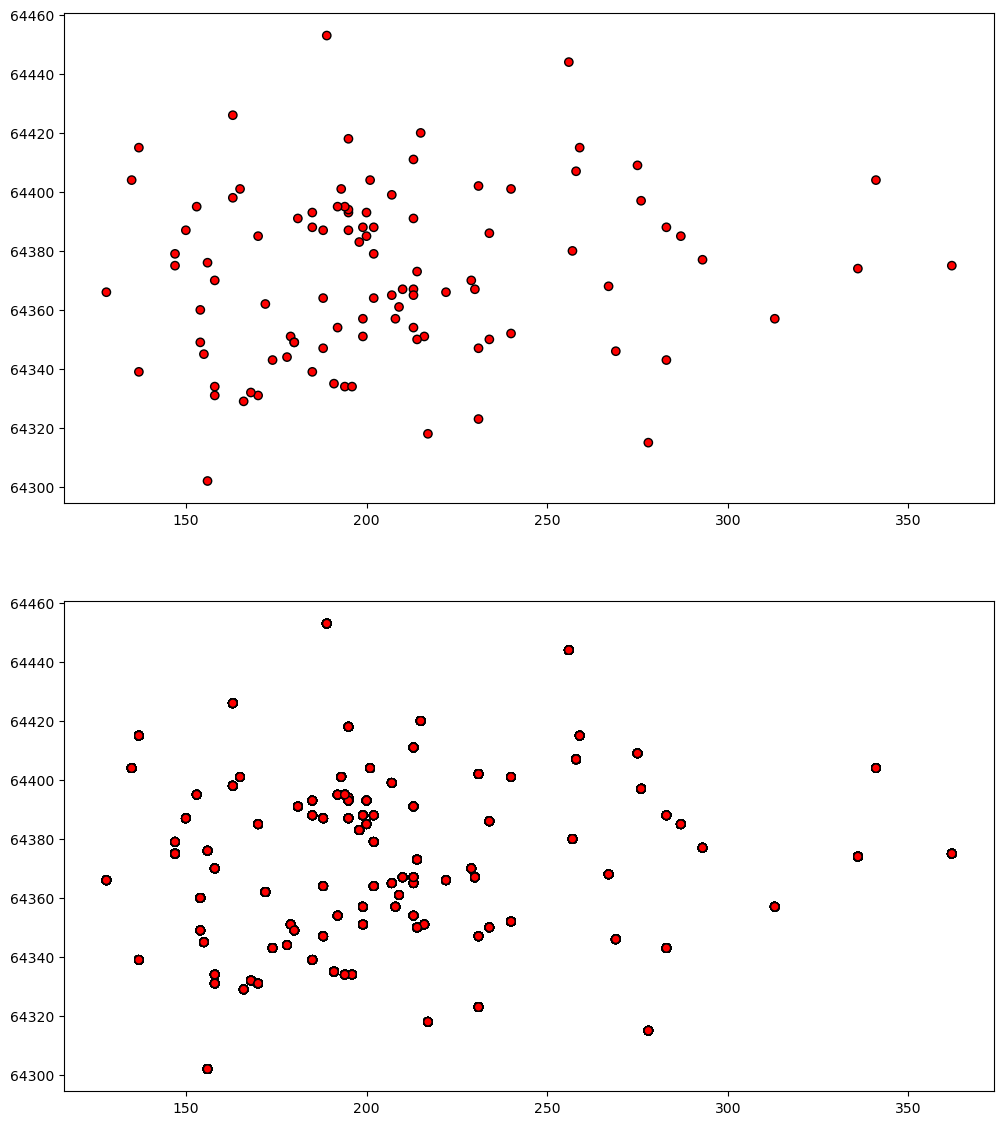

In [86]:
plot_data([engine_df, res_ros], only_failures=True)

In [87]:
res_ros.describe()

x_1           x_2             y
count  41062.000000  41062.000000  41062.000000
mean     157.114315  64319.930617      0.500000
std       76.162847     66.187678      0.500006
min        1.000000  64121.000000      0.000000
25%      103.000000  64264.000000      0.000000
50%      167.000000  64334.000000      0.500000
75%      205.000000  64375.000000      1.000000
max      362.000000  64453.000000      1.000000

In [88]:
engine_df.describe()

x_1           x_2             y
count  20631.000000  20631.000000  20631.000000
mean     108.807862  64268.093355      0.004847
std       68.880990     50.005327      0.069454
min        1.000000  64121.000000      0.000000
25%       52.000000  64232.500000      0.000000
50%      104.000000  64264.000000      0.000000
75%      156.000000  64300.000000      0.000000
max      362.000000  64453.000000      1.000000

In [89]:
engine_df.groupby("y").size(), res_ros.groupby("y").size() 

(y
 0    20531
 1      100
 dtype: int64,
 y
 0    20531
 1    20531
 dtype: int64)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> quines diferències i similituds trobes a les dues imatges anteriors? Raoneu la resposta tenint en compte la distribució dels dos conjunts, és a dir, el nombre d'avaries de motor.
</div>

Les dues imatges semblen iguals, el que veiem en investigar les dades o llegint la documentacio es que el RandomOverSampling genera noves dades pero identiques a les existents. En el nou dataset tenim tantes avaries com no avaires (mitjana 0.5) perque hem incrementat les dades fins a tenir tantes avaries com no avaries.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> grafiqueu les avaries del conjunt de dades original i l'obtingut en aplicar Random Over Sampling, utilitzant la funció <strong>plot_data</strong> amb el paràmetre "only_failures" fixat a False.
</div>

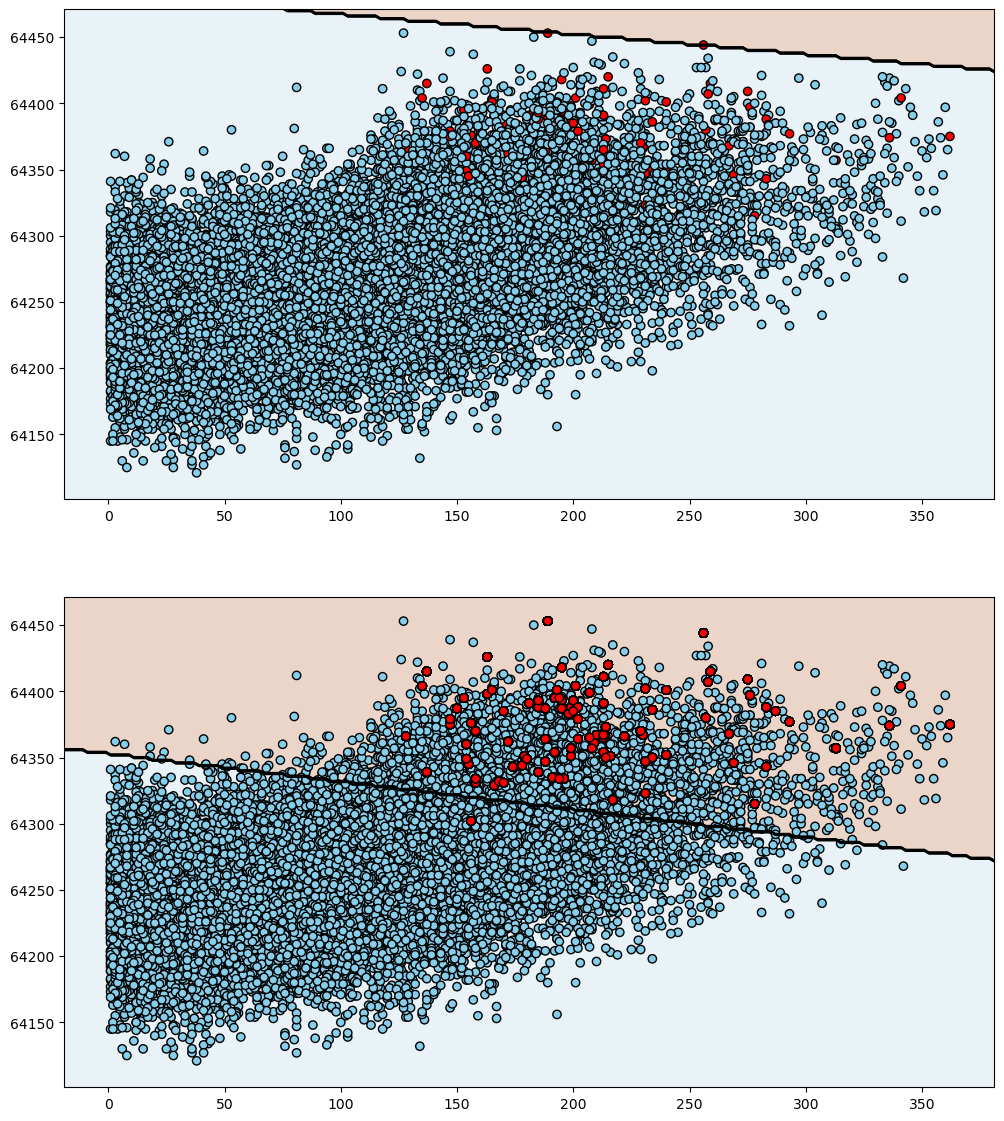

In [90]:
plot_data([engine_df, res_ros], only_failures=False)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Tenint en compte l'anàlisi anterior, què ha passat amb la frontera de decisió? per què?
</div>

La frontera de decisio ha millorat per tenir en compte les avaries. Ara som capacos de detectar totes les avaries menys una (gracies al Random Over Sampling). Com que hem fet oversampling no cal canviar la metrica. El model te tantes avaries com no avaries per tant ara intenta separar les classes basant-se en aixo. Costa de visualitzar en aquesta grafica una mica perque hi ha tants punts vermells com blaus, pero els vermells estan "amagats" darrera els altres.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> grafiqueu les avaries dels tres conjunts de dades obtingudes en aplicar les tres tècniques de sobremostreig, utilitzant la funció <strong>plot_data</strong> amb el paràmetre "only_failures" fixat a True.
</div>

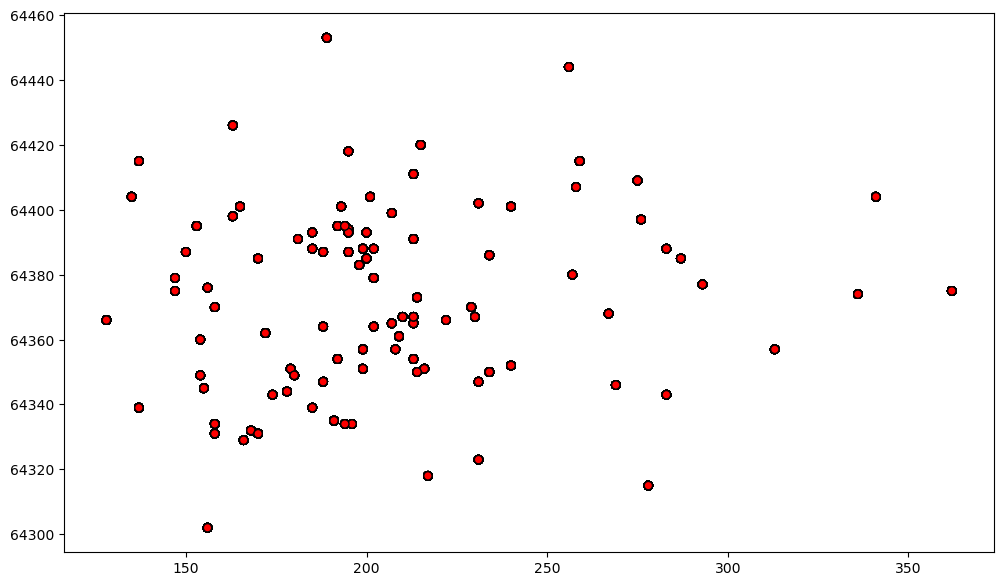

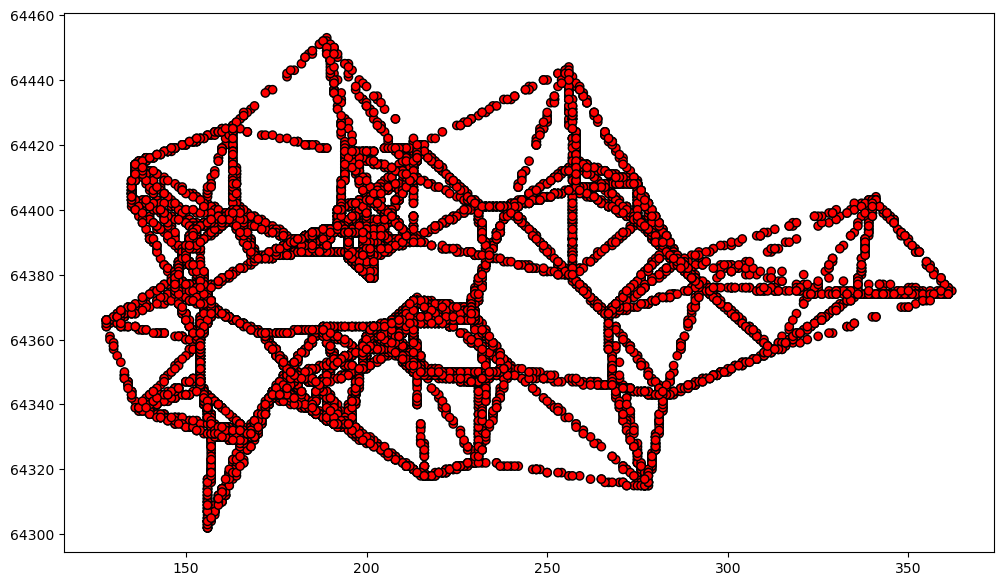

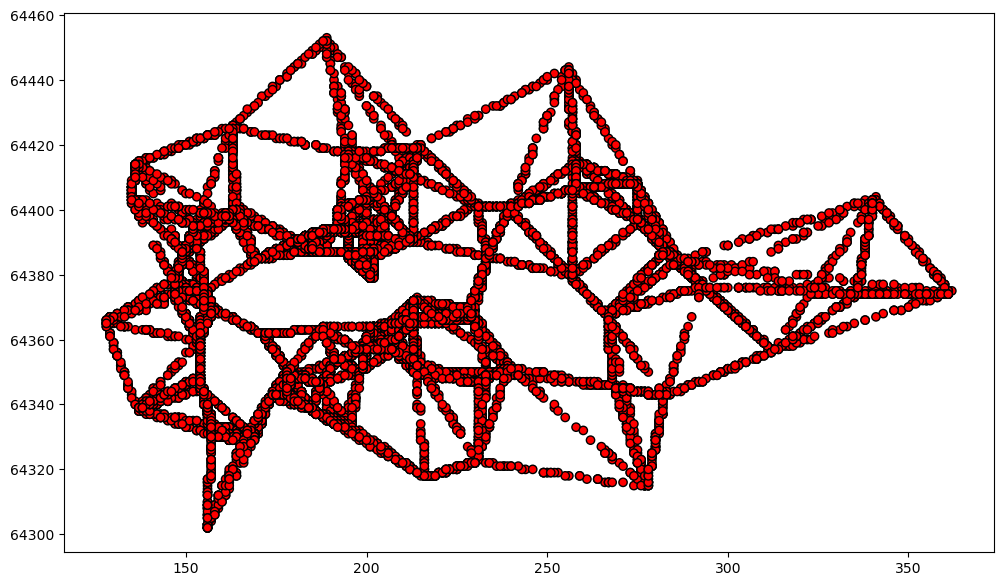

In [91]:
my_models = [res_ros, res_smote, res_adasyn]
for model in my_models:
    plot_data(model, only_failures=True)

In [92]:
for model in my_models:
    print(model.describe())
    print(model.groupby("y").size())

                x_1           x_2             y
count  41062.000000  41062.000000  41062.000000
mean     157.114315  64319.930617      0.500000
std       76.162847     66.187678      0.500006
min        1.000000  64121.000000      0.000000
25%      103.000000  64264.000000      0.000000
50%      167.000000  64334.000000      0.500000
75%      205.000000  64375.000000      1.000000
max      362.000000  64453.000000      1.000000
y
0    20531
1    20531
dtype: int64
                x_1           x_2             y
count  41062.000000  41062.000000  41062.000000
mean     156.662608  64319.659271      0.500000
std       75.091668     65.391797      0.500006
min        1.000000  64121.000000      0.000000
25%      103.000000  64264.000000      0.000000
50%      167.000000  64335.000000      0.500000
75%      204.000000  64374.000000      1.000000
max      362.000000  64453.000000      1.000000
y
0    20531
1    20531
dtype: int64
                x_1           x_2             y
count  41052.0

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Tenint en compte el nombre de mostres amb avaria de motor a cada conjunt, comenteu les diferències i similituds a les imatges de l'exercici anterior. Justifiqueu la resposta tenint en compte el comportament de cadascuna de les tècniques utilitzades.
</div>

SMOTE i ADASYN generen nous valors d'avaria pero enlloc de tenir els mateixos x_1 i y1 com el RandomOverSampler, els valors de x_1 i y_1 tenen valors sintetics al voltant dels valors originals. Aixo es pot veure molt be en el grafic. La mitjana segueix sent 0.5 indicant que hi ha tantes avaries com no avaries en qualsevol dels tres metodes.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> grafiqueu les avaries dels tres conjunts de dades obtingudes en aplicar les tres tècniques de sobremostreig, utilitzant la funció <strong>plot_data</strong> amb el paràmetre "only_failures" fixat a False.
</div>

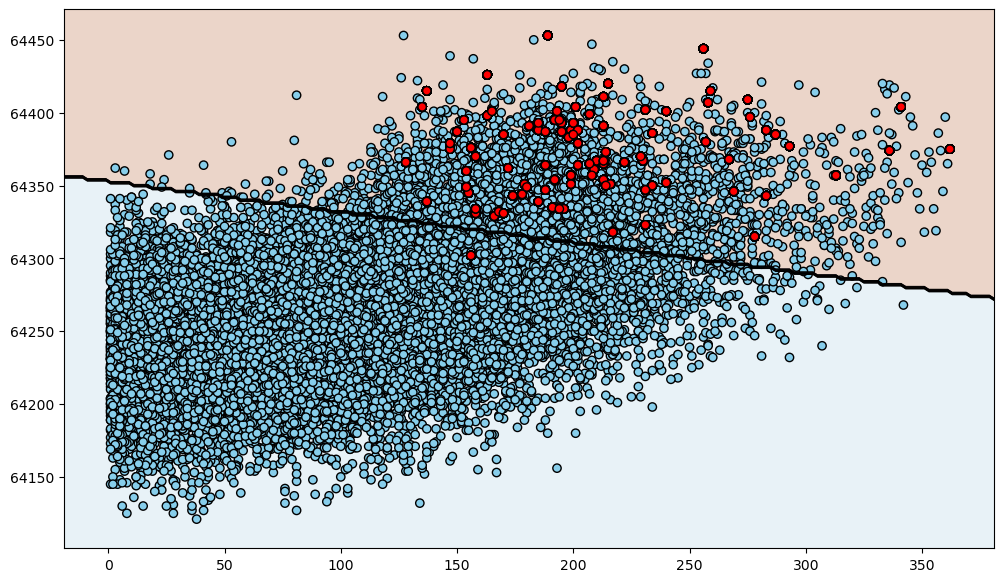

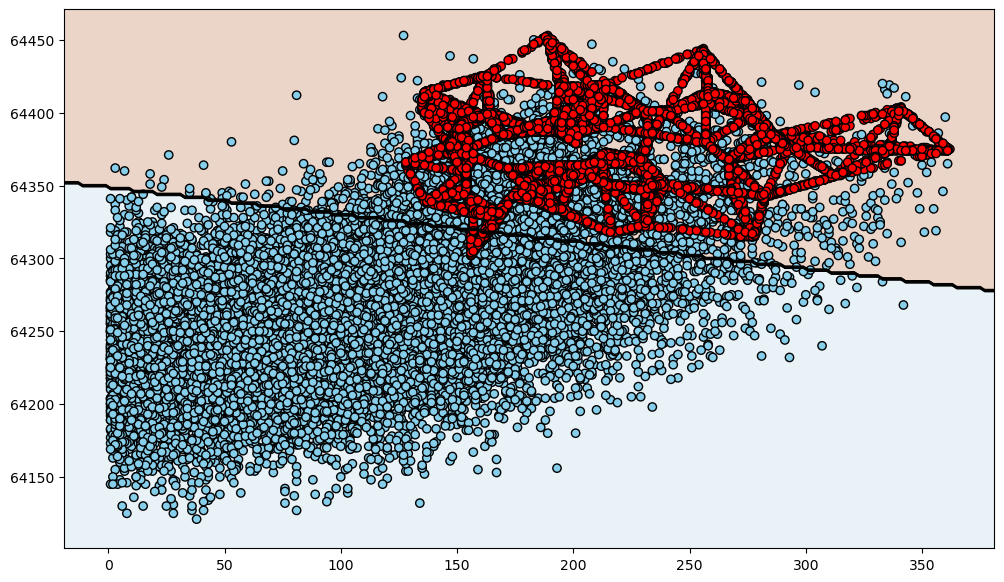

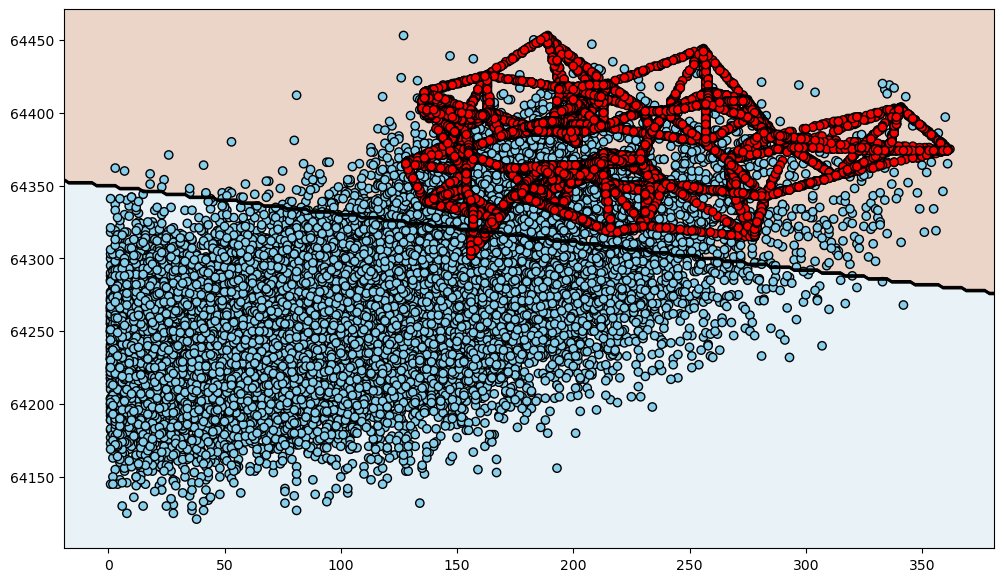

In [93]:
for model in my_models:
    plot_data(model, only_failures=False)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Tenint en compte l'anàlisi anterior, què ha passat amb la frontera de decisió? per què? Tingueu en compte que el classificador base utilitzat és lineal.
</div>

La frontera de decisio tambe ha millorat per separar les avaries. Ara som capacos de detectar gairebe totes la avaries.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Per finalitzar l'exercici, imagineu que heu d'abordar un problema de classificació binari desbalancejat i utilitzeu la tècnica SMOTE per balancejar el conjunt. aquesta tècnica s'hauria d'aplicar abans o després de dividir el conjunt en entrenament/validació/test? per què? Justifica la resposta.
</div>

Despres. Sempre s'ha de dividir entre train i validacio/test al principi, i despres modelar la nostra training data. Si no ho fem, correm el risc de fer data leakage, overfitting, i realment no estem fent servir el "test" com a test, perque haurem utilitzat dades del test per construir el nostre model. Perque el test sigui efectiu en dir-nos com funciona el nostre model, es molt important que no es faci servir cap informacio del test per construir el nostre model.